<a href="https://colab.research.google.com/github/skyshine460/music_genre/blob/main/submission_musicgenre_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期設定

In [173]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm

In [174]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# データの読み込み

In [175]:
train = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/train.csv")
test = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/test.csv")
sample_submit = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/sample_submit.csv", header=None)
genre_labels = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/genre_labels.csv")

In [176]:
# 各カラムのデータ型と欠損値（nan）を表示
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(df.shape)
    return info_df


information_df(train)

(4046, 14)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
genre,int64,0,11,"[10, 8, 3, 7, 2, 0, 1, 5, 9, 6, 4]"
popularity,int64,0,82,"[11, 69, 43, 45, 57, 32, 31, 19, 50, 16, 24, 5..."
duration_ms,int64,0,3970,"[201094, 308493, 197225, 301092, 277348, 25260..."
acousticness,float64,0,4046,"[0.1128111339828574, 0.1013332411083806, 0.496..."
positiveness,float64,10,4036,"[0.1572471780947721, 0.3465631954810996, 0.265..."
danceability,float64,8,4038,"[0.1878413799606568, 0.5544436605863335, 0.457..."
loudness,float64,0,4025,"[-1.884852050233595, -5.54649493681357, -9.255..."
energy,float64,0,4046,"[0.8939182385290325, 0.8744085353913282, 0.439..."
liveness,float64,3,4043,"[0.3635681822718619, 0.1938915206606696, 0.217..."


In [177]:
information_df(test)

(4046, 13)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
popularity,int64,0,83,"[43, 40, 58, 49, 50, 44, 64, 54, 20, 62, 37, 4..."
duration_ms,int64,0,3979,"[192465, 226536, 215385, 254494, 230934, 25162..."
acousticness,float64,1,4045,"[0.5598121230375783, 0.1340021537348863, 0.140..."
positiveness,float64,14,4032,"[0.5650351641220922, 0.5425468592281093, 0.643..."
danceability,float64,11,4035,"[0.5222366778174427, 0.4931278872218601, 0.533..."
loudness,float64,0,4025,"[-12.217087234804069, -2.6128461025042173, -3...."
energy,float64,1,4045,"[0.6205095242030846, 0.853089361915109, 0.8344..."
liveness,float64,6,4040,"[0.38972707489484, 0.1631061746172431, 0.42930..."
speechiness,float64,11,4035,"[0.2149894450060735, 0.184183168575654, 0.1673..."


In [178]:
information_df(sample_submit)

(4046, 2)


,dtypes,NaN Count,Nunique,Unique Values
0,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
1,int64,0,11,"[9, 8, 4, 2, 5, 3, 6, 10, 7, 1, 0]"


In [179]:
genre_labels

,genre,labels
0,country,0
1,electronic,1
2,folk,2
3,hip-hop,3
4,jazz,4
5,latin,5
6,classic,6
7,other-light-music,7
8,pop,8
9,religious,9


# EDA

In [180]:
# object型をカテゴリ型に変換する
for col in train.columns:
    if train[col].dtype == "object":  # object型の列を探す
        train[col] = train[col].astype("category")  # カテゴリ型に変換

In [181]:
# import pandas as pd

# # ユニークなジャンルを取得し、ワンホットエンコーディングを適用
# genre_dummies = pd.get_dummies(train["genre"], prefix='genre')
# genre_dummies = genre_dummies.astype(int)

# # 元のデータフレームにワンホットエンコーディングしたカラムを結合
# train = pd.concat([train, genre_dummies], axis=1)

# # 結果を表示
# train.head()

In [182]:
train_eda = train.copy()

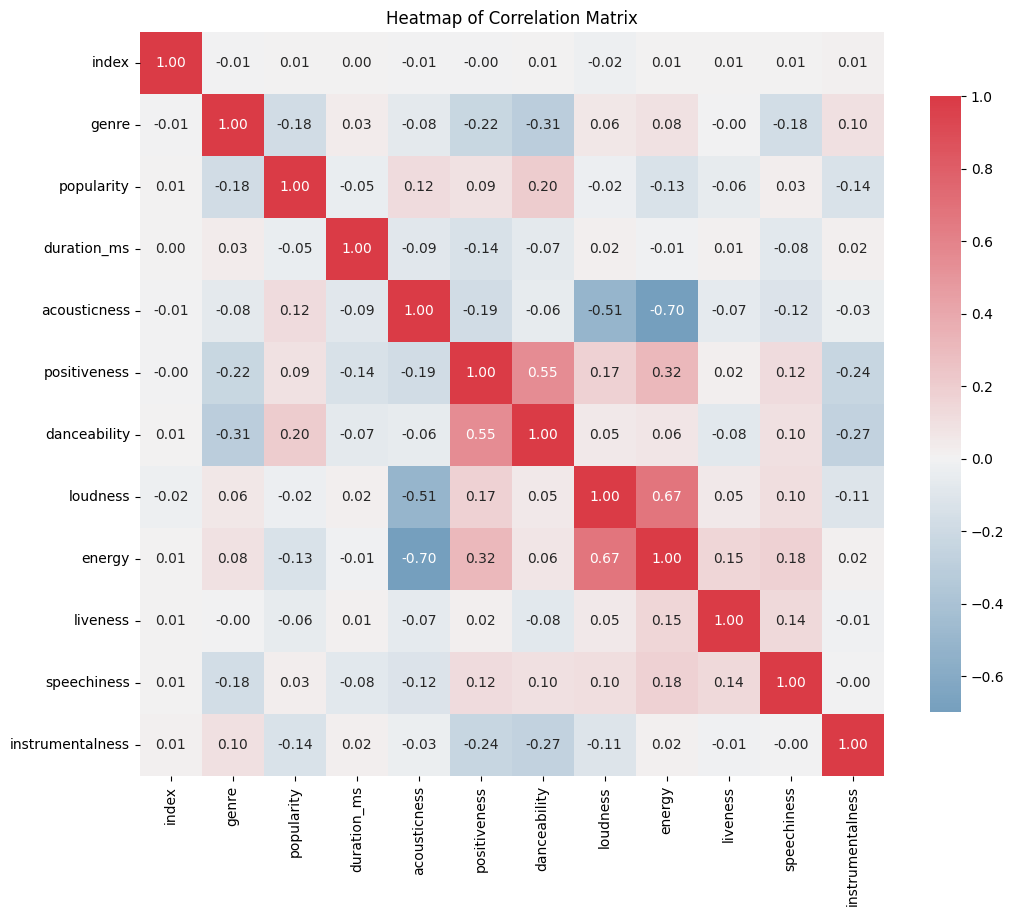

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df):
    # 数値データのみを抽出
    numeric_df = df.select_dtypes(include=['number'])

    # 相関行列を計算
    correlation_matrix = numeric_df.corr()

    # ヒートマップを描画
    plt.figure(figsize=(12, 10))  # サイズを大きくする
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap=sns.diverging_palette(240, 10, as_cmap=True),  # 青から赤のカラーマップ
        center=0,  # 中心を0に設定
        square=True,
        cbar_kws={"shrink": .8},
        annot_kws={"size": 10}  # アノテーションのフォントサイズを設定
    )
    plt.title('Heatmap of Correlation Matrix', fontsize=12)  # タイトルのフォントサイズを設定
    plt.show()

plot_heatmap(train)

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4046 non-null   int64   
 1   genre             4046 non-null   int64   
 2   popularity        4046 non-null   int64   
 3   duration_ms       4046 non-null   int64   
 4   acousticness      4046 non-null   float64 
 5   positiveness      4036 non-null   float64 
 6   danceability      4038 non-null   float64 
 7   loudness          4046 non-null   float64 
 8   energy            4046 non-null   float64 
 9   liveness          4043 non-null   float64 
 10  speechiness       4038 non-null   float64 
 11  instrumentalness  4045 non-null   float64 
 12  tempo             4046 non-null   category
 13  region            4046 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 388.4 KB


In [185]:
def normal_distribution_fit(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # カテゴリデータかどうかを判定
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # カテゴリデータの場合
        sns.countplot(x=df[col], ax=ax[0])
        ax[0].set_title('Bar Plot of Categorical Data')
    else:
        # 数値データの場合
        sns.histplot(df[col], kde=True, stat='density', ax=ax[0])
        # 正規分布のフィット
        sns.histplot(df[col], stat='density', ax=ax[0], bins=30)
        x = np.linspace(df[col].min(), df[col].max(), 100)
        ax[0].plot(x, norm.pdf(x, df[col].mean(), df[col].std()), color='red')
        ax[0].set_title('Histogram with Normal Distribution Fit')

        # Q-Qプロット
        stats.probplot(df[col], plot=ax[1])
        ax[1].set_title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

    # 数値データの場合のみスキューネスとカートシスを計算
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        print(f"Skewness: {df[col].skew()}")
        print(f"Kurtosis: {df[col].kurt()}")

    # 欠損値の確認
    print(f"isnull: {df[col].isnull().sum()}")

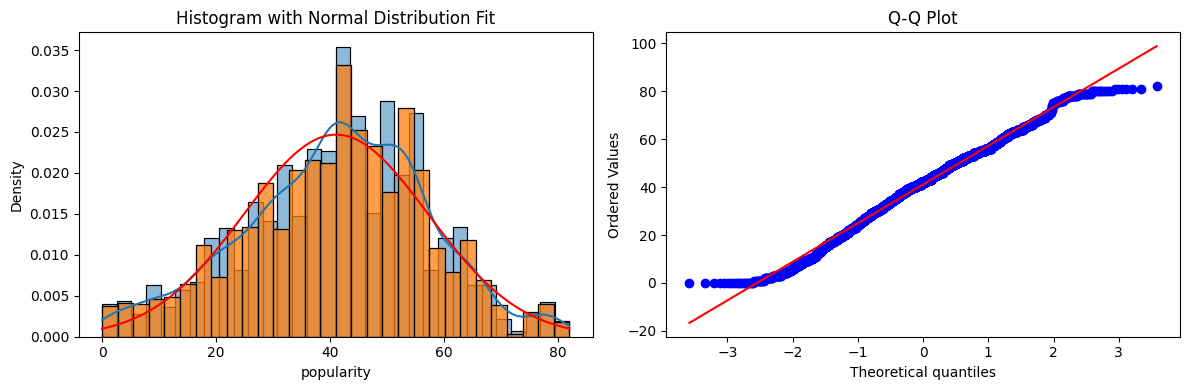

Skewness: -0.1931886929160876
Kurtosis: -0.16217719732673475
isnull: 0


In [186]:
normal_distribution_fit(train, 'popularity')

欠損値も外れ値もないのでそのままとする

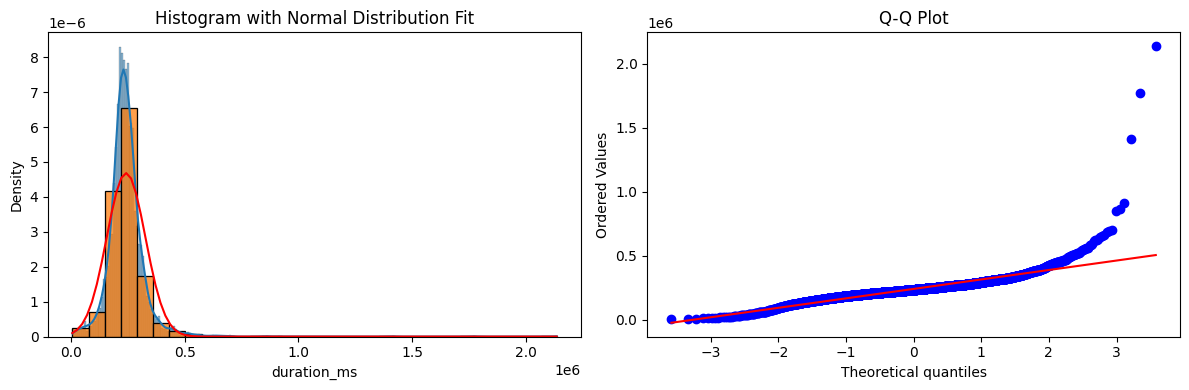

Skewness: 5.618124572116062
Kurtosis: 98.07894066286671
isnull: 0


In [187]:
normal_distribution_fit(train, 'duration_ms')

In [188]:
train_larst = train.nlargest(5, "duration_ms")
train_smallest = train.nsmallest(5, "duration_ms")

display(train_larst, train_smallest)

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
2620,2620,10,29,2135773,0.102149,0.118638,0.352563,-11.618171,0.742689,0.354130,0.122449,0.808099,121-152,region_B
2254,2254,10,42,1770120,0.094478,0.424399,0.429143,-9.836961,0.781143,0.268573,0.179663,0.573140,97-120,unknown
1628,1628,10,29,1413028,0.333316,0.447038,0.550810,-5.369964,0.003383,0.536083,0.249316,0.130702,97-120,region_B
306,306,10,16,913962,0.104400,0.215772,0.273501,-11.505181,0.478082,0.244847,0.108123,0.262219,121-152,region_T
1968,1968,10,53,861612,0.190366,0.167569,0.384203,-9.454223,0.344180,0.197390,0.105776,0.190699,97-120,region_P


,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
332,332,10,18,5998,0.073058,NaN,NaN,-3.492185,0.482935,NaN,NaN,0.933298,0-40,region_P
1147,1147,10,17,5999,0.246239,NaN,NaN,-11.188019,0.138494,NaN,NaN,NaN,0-40,region_P
1859,1859,10,17,6002,0.166670,NaN,NaN,-3.675506,0.630632,NaN,NaN,0.878543,0-40,region_P
1894,1894,8,28,12105,0.894437,NaN,NaN,-30.401654,0.294521,0.68064,NaN,0.353691,0-40,region_E
1824,1824,10,29,12904,0.878264,NaN,NaN,-37.820457,0.071458,0.30617,NaN,0.209245,0-40,region_B


時間が長いものはclass10の特徴のように見えるが、逆に短いのもclass10が当てはまる。
外れ値として、除外する影響を確認してみる。

In [189]:
# train_eda = train_eda[train_eda["duration_ms"] < 1000000]
# normal_distribution_fit(train_eda, 'duration_ms')

In [190]:
# test_larst = test.nlargest(5, "duration_ms")
# test_larst

testデータにも近しい値があったり、CVが悪化したので、外れ値とはせずにそのままにする

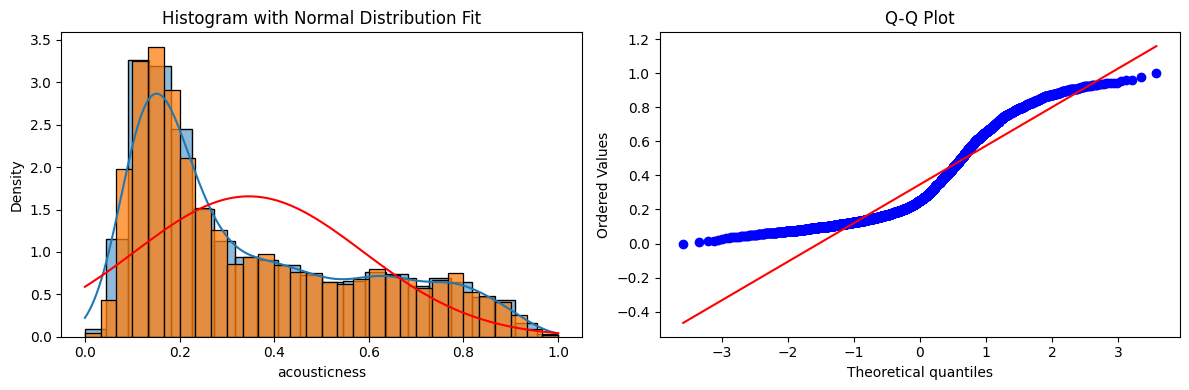

Skewness: 0.807398999088221
Kurtosis: -0.6013623520305091
isnull: 0


In [191]:
normal_distribution_fit(train, 'acousticness')

欠損値も外れ値もないのでそのままとする

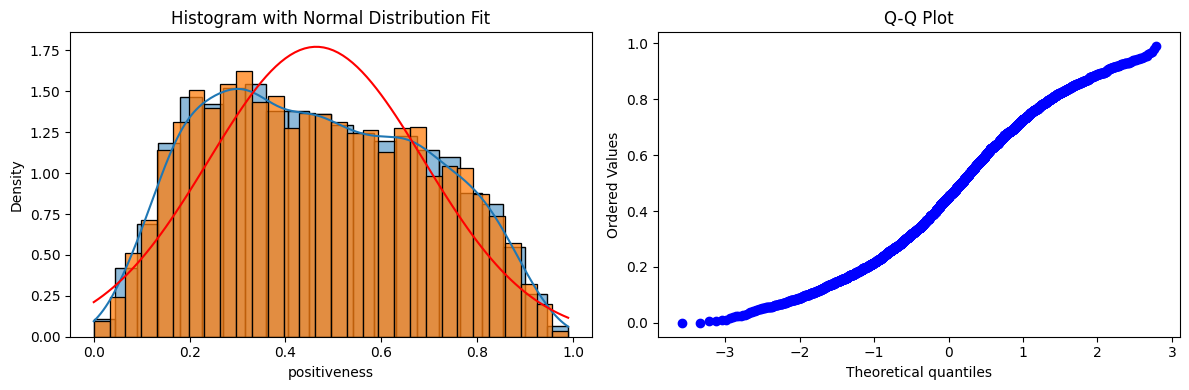

Skewness: 0.16233880923713861
Kurtosis: -0.9867580036835646
isnull: 10


In [192]:
normal_distribution_fit(train, 'positiveness')

平均値で補間すると、CVが悪化したので、他のカラムと合わせてあとでk-NN補間する

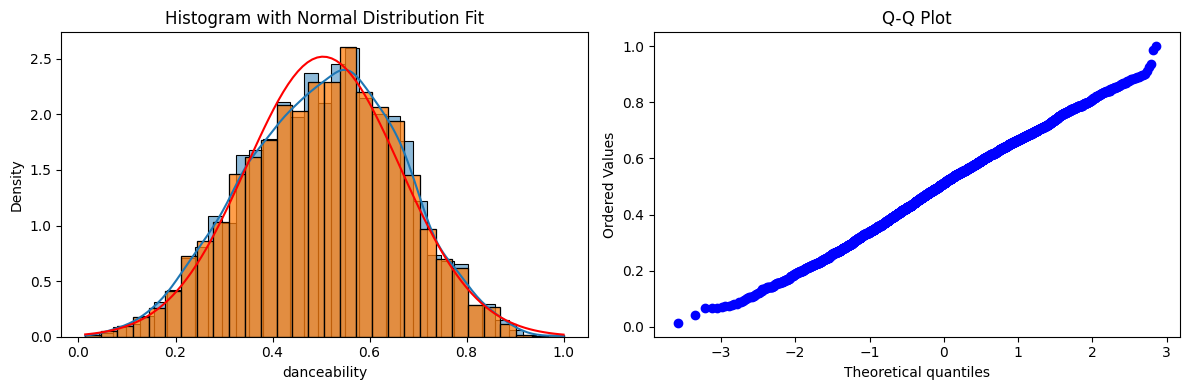

Skewness: -0.11225367214852411
Kurtosis: -0.3650289427287823
isnull: 8


In [193]:
normal_distribution_fit(train, 'danceability')

あとでk-NN補間する

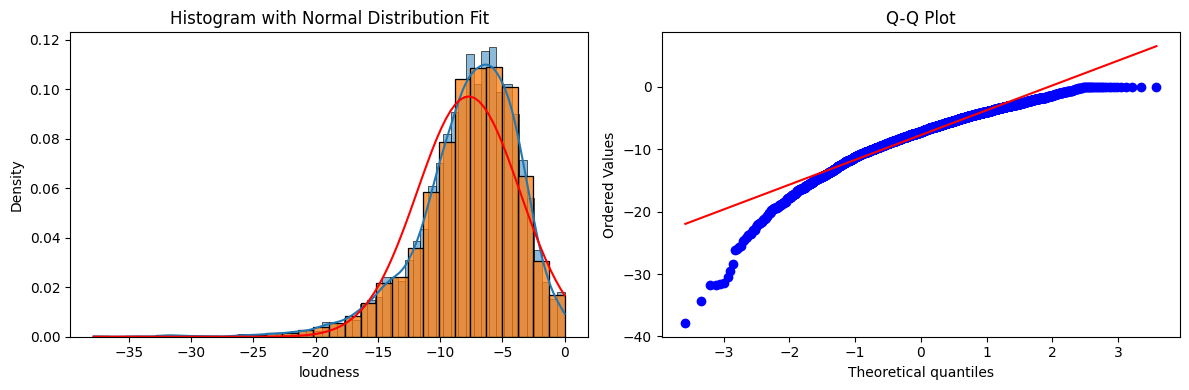

Skewness: -1.2511839396106839
Kurtosis: 3.5743202515288526
isnull: 0


In [194]:
normal_distribution_fit(train, 'loudness')

欠損値も外れ値もないのでそのままとする

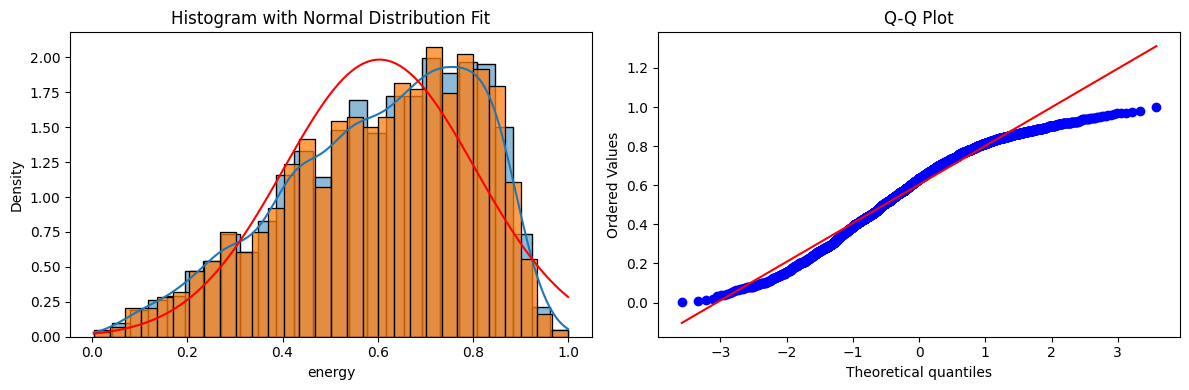

Skewness: -0.527972808859339
Kurtosis: -0.46078173616043383
isnull: 0


In [195]:
normal_distribution_fit(train, 'energy')

欠損値も外れ値もないのでそのままとする

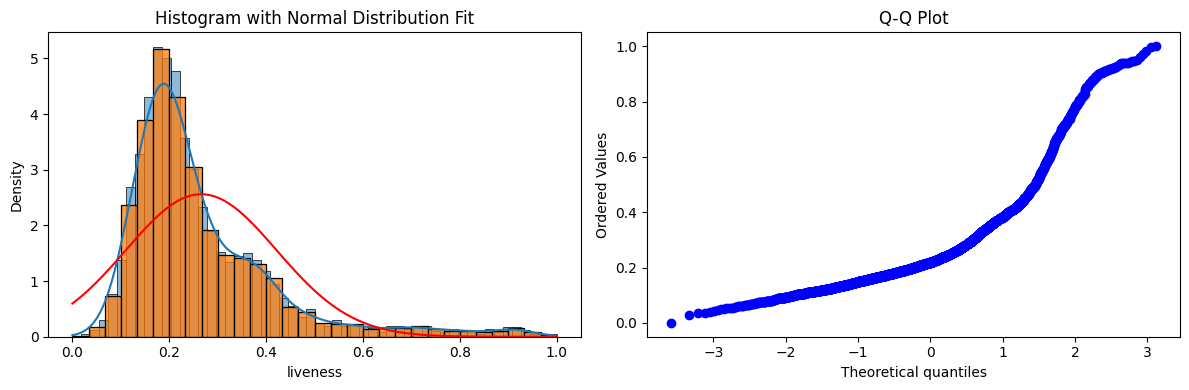

Skewness: 1.978775490436319
Kurtosis: 4.616321054794998
isnull: 3


In [196]:
normal_distribution_fit(train, 'liveness')

あとでk-NN補間する

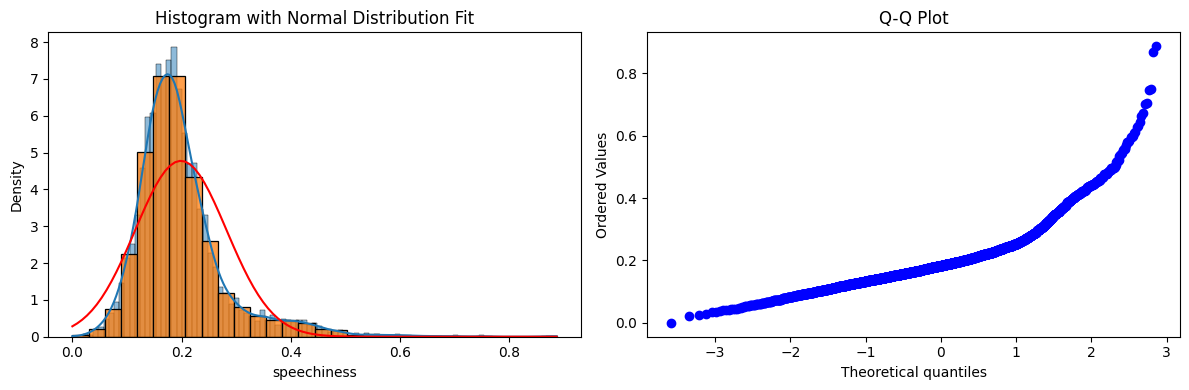

Skewness: 1.9828719313424537
Kurtosis: 7.038617042381643
isnull: 8


In [197]:
normal_distribution_fit(train, 'speechiness')

あとでk-NN補間する

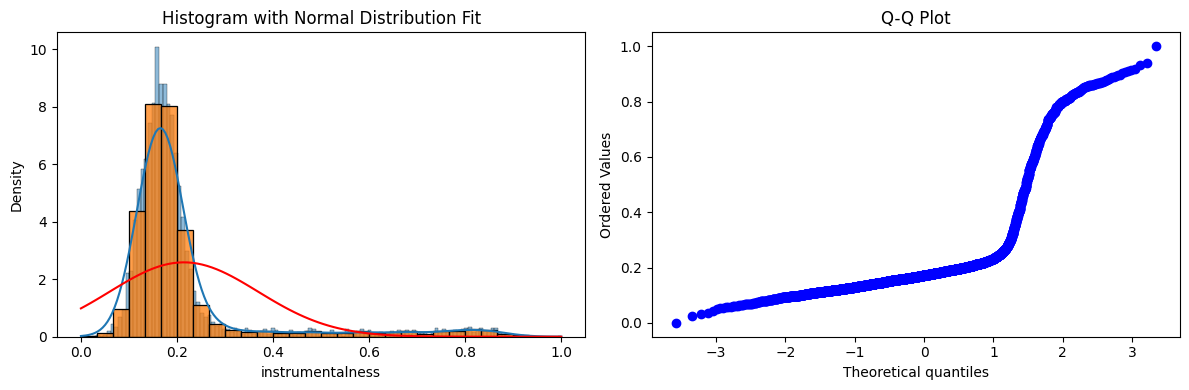

Skewness: 2.881302830041316
Kurtosis: 7.915340044203534
isnull: 1


In [198]:
normal_distribution_fit(train, 'instrumentalness')

あとでk-NN補間する

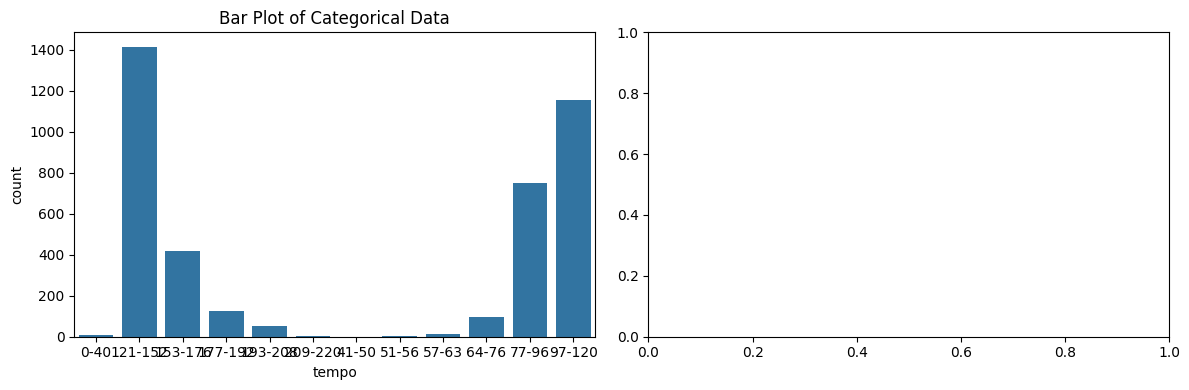

isnull: 0


In [199]:
normal_distribution_fit(train, 'tempo')

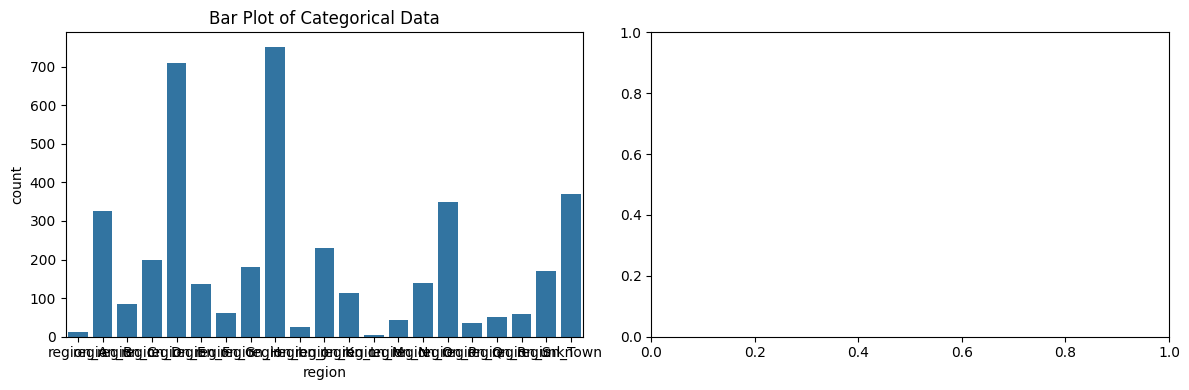

isnull: 0


In [200]:
normal_distribution_fit(train, 'region')

# trainデータとtestデータの合算処理

In [201]:
train_eda["is_train"] = 1
test["is_train"] = 0

# train_edaにデータを追加していればtestデータにもカラムを追加

merged_df = pd.concat([train_eda, test], ignore_index=True)
merged_df.shape

(8092, 15)

In [202]:
# 'tempo'カラムをワンホットエンコーディング
tempo_dummies = pd.get_dummies(merged_df['tempo'], prefix='tempo')
tempo_dummies = tempo_dummies.astype(int)

# 元のデータフレームにワンホットエンコーディングしたカラムを結合
merged_df = pd.concat([merged_df, tempo_dummies], axis=1)

# 結果を表示
merged_df.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'tempo_0-40', 'tempo_121-152', 'tempo_153-176', 'tempo_177-192',
       'tempo_193-208', 'tempo_209-220', 'tempo_41-50', 'tempo_51-56',
       'tempo_57-63', 'tempo_64-76', 'tempo_77-96', 'tempo_97-120'],
      dtype='object')

In [203]:
# 'region'カラムをワンホットエンコーディング
region_dummies = pd.get_dummies(merged_df['region'], prefix='region')
region_dummies = region_dummies.astype(int)

# 元のデータフレームにワンホットエンコーディングしたカラムを結合
merged_df = pd.concat([merged_df, region_dummies], axis=1)

# 結果を表示
merged_df.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'tempo_0-40', 'tempo_121-152', 'tempo_153-176', 'tempo_177-192',
       'tempo_193-208', 'tempo_209-220', 'tempo_41-50', 'tempo_51-56',
       'tempo_57-63', 'tempo_64-76', 'tempo_77-96', 'tempo_97-120',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown'],
      dtype='object')

In [204]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# MinMaxScalerのインスタンスを作成
scaler = MinMaxScaler()

# スケーリングを実行
df_scaled_array = scaler.fit_transform(merged_df[[
       'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'region_region_A',
       'region_region_B', 'region_region_C', 'region_region_D',
       'region_region_E', 'region_region_F', 'region_region_G',
       'region_region_H', 'region_region_I', 'region_region_J',
       'region_region_K', 'region_region_L', 'region_region_M',
       'region_region_N', 'region_region_O', 'region_region_P',
       'region_region_Q', 'region_region_R', 'region_region_S',
       'region_region_T', 'region_unknown', 'tempo_0-40', 'tempo_121-152',
       'tempo_153-176', 'tempo_177-192', 'tempo_193-208', 'tempo_209-220',
       'tempo_41-50', 'tempo_51-56', 'tempo_57-63', 'tempo_64-76',
       'tempo_77-96', 'tempo_97-120']])

# 補間を行うためのKNNImputerを設定
imputer = KNNImputer(n_neighbors=2)

# k-NN補間を使用して欠損値を補完
df_imputed_array = imputer.fit_transform(df_scaled_array)

# 補完されたデータを元のスケールに逆変換
df_imputed_original = scaler.inverse_transform(df_imputed_array)

numeric_columns = [
       'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness',  'region_region_A',
       'region_region_B', 'region_region_C', 'region_region_D',
       'region_region_E', 'region_region_F', 'region_region_G',
       'region_region_H', 'region_region_I', 'region_region_J',
       'region_region_K', 'region_region_L', 'region_region_M',
       'region_region_N', 'region_region_O', 'region_region_P',
       'region_region_Q', 'region_region_R', 'region_region_S',
       'region_region_T', 'region_unknown', 'tempo_0-40', 'tempo_121-152',
       'tempo_153-176', 'tempo_177-192', 'tempo_193-208', 'tempo_209-220',
       'tempo_41-50', 'tempo_51-56', 'tempo_57-63', 'tempo_64-76',
       'tempo_77-96', 'tempo_97-120']

# 補完されたデータをDataFrameに戻す
df_imputed = pd.DataFrame(df_imputed_original, columns=numeric_columns)

# merged_dfの特定のカラムをdf_imputedで置き換える
merged_df[[
       'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness',  'region_region_A',
       'region_region_B', 'region_region_C', 'region_region_D',
       'region_region_E', 'region_region_F', 'region_region_G',
       'region_region_H', 'region_region_I', 'region_region_J',
       'region_region_K', 'region_region_L', 'region_region_M',
       'region_region_N', 'region_region_O', 'region_region_P',
       'region_region_Q', 'region_region_R', 'region_region_S',
       'region_region_T', 'region_unknown', 'tempo_0-40', 'tempo_121-152',
       'tempo_153-176', 'tempo_177-192', 'tempo_193-208', 'tempo_209-220',
       'tempo_41-50', 'tempo_51-56', 'tempo_57-63', 'tempo_64-76',
       'tempo_77-96', 'tempo_97-120']] = df_imputed

# 欠損値の確認
print(merged_df.isnull().sum())

index                  0
genre               4046
popularity             0
duration_ms            0
acousticness           0
positiveness           0
danceability           0
loudness               0
energy                 0
liveness               0
speechiness            0
instrumentalness       0
tempo                  0
region                 0
is_train               0
tempo_0-40             0
tempo_121-152          0
tempo_153-176          0
tempo_177-192          0
tempo_193-208          0
tempo_209-220          0
tempo_41-50            0
tempo_51-56            0
tempo_57-63            0
tempo_64-76            0
tempo_77-96            0
tempo_97-120           0
region_region_A        0
region_region_B        0
region_region_C        0
region_region_D        0
region_region_E        0
region_region_F        0
region_region_G        0
region_region_H        0
region_region_I        0
region_region_J        0
region_region_K        0
region_region_L        0
region_region_M        0


In [205]:
train_df = merged_df[merged_df["is_train"] == 1]
test_df = merged_df[merged_df["is_train"] == 0]

# LightGBM

In [206]:
train_df.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'tempo_0-40', 'tempo_121-152', 'tempo_153-176', 'tempo_177-192',
       'tempo_193-208', 'tempo_209-220', 'tempo_41-50', 'tempo_51-56',
       'tempo_57-63', 'tempo_64-76', 'tempo_77-96', 'tempo_97-120',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown'],
      dtype='object')

In [207]:
feature = ['popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown']

In [208]:
x_train = train_df[feature]
y_train = train_df["genre"]
id_train = train_df["index"]

In [209]:
# object型をカテゴリ型に変換する
for col in x_train.columns:
    if x_train[col].dtype == "object":  # object型の列を探す
        x_train[col] = x_train[col].astype("category")  # カテゴリ型に変換

x_train.dtypes

,0
popularity,float64
duration_ms,float64
acousticness,float64
positiveness,float64
danceability,float64
loudness,float64
energy,float64
liveness,float64
speechiness,float64
instrumentalness,float64


In [210]:
y_train.value_counts()

,count
genre,
10.0,1337
8.0,1305
3.0,362
7.0,334
1.0,205
2.0,191
5.0,126
9.0,59
6.0,50


In [211]:
import numpy as np
import pandas as pd
import pickle
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import matplotlib.pyplot as plt

def train_lgb(input_x, input_y, input_id, params, list_nfold=[0, 1, 2, 3, 4], n_splits=5):
    train_oof = np.zeros(len(input_x))  # Out-of-Fold予測用の配列
    metrics = []
    imp = pd.DataFrame()

    # クロスバリデーションの設定
    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123).split(input_x, input_y))

    for nfold in list_nfold:
        print("-" * 20, nfold, "-" * 20)

        # データセットの分割
        idx_tr, idx_va = cv[nfold]
        x_tr, y_tr = input_x.iloc[idx_tr], input_y.iloc[idx_tr]
        x_va, y_va = input_x.iloc[idx_va], input_y.iloc[idx_va]
        print("Train shape:", x_tr.shape, "Validation shape:", x_va.shape)

        # モデルのトレーニング
        model = LGBMClassifier(**params)
        model.fit(
            x_tr, y_tr,
            eval_set=[(x_tr, y_tr), (x_va, y_va)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)]
        )

        # モデルの保存
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "wb") as f:
            pickle.dump(model, f, protocol=4)

        # 評価
        y_tr_pred = model.predict_proba(x_tr)  # 各クラスに対する確率を取得
        y_va_pred = model.predict_proba(x_va)

        # argmaxを使ってクラスラベルに変換
        y_tr_pred_labels = y_tr_pred.argmax(axis=1)  # トレーニングデータの予測クラス
        y_va_pred_labels = y_va_pred.argmax(axis=1)  # バリデーションデータの予測クラス

        # F1スコアの計算
        metric_tr = f1_score(y_tr, y_tr_pred_labels, average='macro')  # トレーニングデータのF1スコア
        metric_va = f1_score(y_va, y_va_pred_labels, average='macro')  # バリデーションデータのF1スコア
        metrics.append([nfold, metric_tr, metric_va])

        # Out-of-Fold予測: クラスラベルに変換して代入
        train_oof[idx_va] = y_va_pred.argmax(axis=1)

        # 特徴量の重要度
        _imp = pd.DataFrame({"col": input_x.columns, "imp": model.feature_importances_, "nfold": nfold})
        imp = pd.concat([imp, _imp])

    print("-" * 20, "Result", "-" * 20)

    # メトリックの表示
    metrics = np.array(metrics)
    print(metrics)
    print("[CV] Train: {:.4f} ± {:.4f}, Validation: {:.4f} ± {:.4f}".format(
        metrics[:, 1].mean(), metrics[:, 1].std(),
        metrics[:, 2].mean(), metrics[:, 2].std(),
    ))

    # Out-of-Fold DataFrame
    train_oof_df = pd.concat([input_id.reset_index(drop=True), pd.DataFrame({"pred": train_oof})], axis=1)

    # 特徴量の重要度を集計
    imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
    imp.columns = ["col", "imp", "imp_std"]

    return train_oof_df, imp, metrics

In [212]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'learning_rate': 0.01,   # 学習率を下げる
    'num_leaves': 32,
    'n_estimators': 100000,
    'random_state': 123,
    'importance_type': 'gain',
    'min_split_gain': 0.01,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'max_depth': 6,   # 木の深さを制限
    'verbosity': -1,  # 出力状況の省略
}

# 学習の実行
train_oof, imp, metrics = train_lgb(
    x_train,
    y_train,
    id_train,
    params,
    list_nfold=[0, 1, 2, 3, 4],
    n_splits=5,
)

-------------------- 0 --------------------
Train shape: (3236, 33) Validation shape: (810, 33)
-------------------- 1 --------------------
Train shape: (3237, 33) Validation shape: (809, 33)
-------------------- 2 --------------------
Train shape: (3237, 33) Validation shape: (809, 33)
-------------------- 3 --------------------
Train shape: (3237, 33) Validation shape: (809, 33)
-------------------- 4 --------------------
Train shape: (3237, 33) Validation shape: (809, 33)
-------------------- Result --------------------
[[0.         0.97216911 0.55759072]
 [1.         0.96242893 0.50013974]
 [2.         0.95774462 0.53205761]
 [3.         0.98110264 0.52686234]
 [4.         0.9687975  0.5335328 ]]
[CV] Train: 0.9684 ± 0.0081, Validation: 0.5300 ± 0.0183


In [213]:
imp.sort_values("imp", ascending=False)

,col,imp,imp_std
7,popularity,91072.433936,3723.552340
0,acousticness,49629.176578,4961.489634
9,region,49434.175074,657.435946
1,danceability,42395.824025,2812.586075
31,speechiness,42288.558374,1613.582120
3,energy,29495.780675,1882.955360
8,positiveness,22967.233918,1481.151740
2,duration_ms,21169.032082,667.814869
4,instrumentalness,19791.839419,1008.267991
6,loudness,19340.525693,1217.524477


In [214]:
x_test = test_df[feature]
test_id = test_df["index"]

for col in x_test.columns:
    if x_test[col].dtype == "object":
        x_test[col] = x_test[col].astype("category")

In [215]:
def compare_columns(train, test):
  # train と test のカラム名をセットに変換
  train_columns = set(train.columns)
  test_columns = set(test.columns)

  # カラム名の差分を計算
  train_only = train_columns - test_columns
  test_only = test_columns - train_columns

  print("train only columns:", train_only)
  print("test only columns:", test_only)

compare_columns(x_train, x_test)

train only columns: set()
test only columns: set()


In [216]:
import numpy as np
import pandas as pd
import pickle

# フォールド数
n_folds = 5
# テストデータに対する予測を保存するための配列
test_pred = np.zeros((len(x_test), n_folds, 11))  # ここで11はクラス数

# 各フォールドのモデルをロードし、テストデータに対する予測を行う
for nfold in range(n_folds):
    with open(f"model_lgb_fold{nfold}.pickle", "rb") as f:
        model = pickle.load(f)

    # 各フォールドのモデルで予測
    y_test_pred = model.predict_proba(x_test)  # 各クラスに対する確率を取得
    test_pred[:, nfold, :] = y_test_pred  # 各フォールドの予測を保存

# 各フォールドごとのクラス確率の平均を計算
test_pred_mean = test_pred.mean(axis=1)  # (4046, 11)

# 最も高い確率を持つクラスを決定
predicted_classes = test_pred_mean.argmax(axis=1)

# 結果をデータフレームに変換
test_pred_df = pd.DataFrame({"id": test_id, "pred": predicted_classes})
test_pred_df.head()

,id,pred
4046,4046,8
4047,4047,10
4048,4048,8
4049,4049,10
4050,4050,8


In [217]:
test_pred_df['pred'].value_counts()

,count
pred,
8,1570
10,1490
3,371
7,297
2,81
1,61
5,57
9,52
4,31


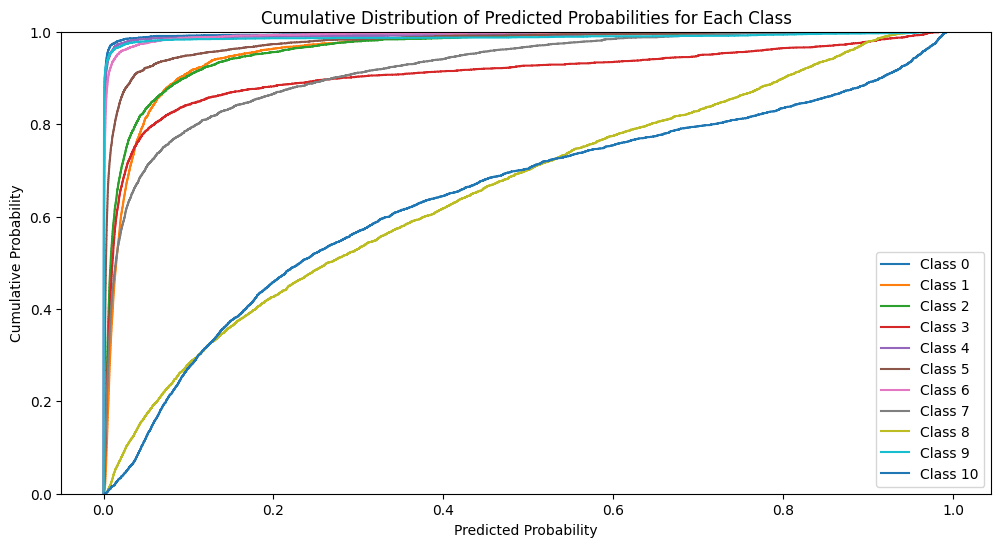

In [218]:
# CDFを描画
plt.figure(figsize=(12, 6))
for i in range(test_pred_mean.shape[1]):
    sns.ecdfplot(test_pred_mean[:, i], label=f'Class {i}')
plt.xlabel("Predicted Probability")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Predicted Probabilities for Each Class")
plt.legend()
plt.show()


In [219]:
df_submit = pd.DataFrame({"id": test_id, "pred": predicted_classes})
df_submit.head()

,id,pred
4046,4046,8
4047,4047,10
4048,4048,8
4049,4049,10
4050,4050,8


In [221]:
df_submit.to_csv("submission_musicgenre_8.csv", index=False, header=False)